<a href="https://colab.research.google.com/github/manisha9608/fake_and_real_news/blob/main/fake_real_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries & Dataset


In [367]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Import Libraries

In [368]:
import numpy as np
import pandas as pd

import csv

import time

import io
from io import BytesIO


import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras import Model
from tensorflow.python.client import device_lib
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import keras

# from keras.layers import Dense, Dropout, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## 1.2 Check GPU Availability

In [369]:

tf.test.gpu_device_name()

'/device:GPU:0'

In [370]:

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6134850521635439899, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1167705686659350969
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [371]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         4801260 kB
MemAvailable:   11350384 kB
Buffers:           93364 kB
Cached:          3746208 kB
SwapCached:            0 kB
Active:          2285840 kB
Inactive:        5782124 kB
Active(anon):    1340584 kB
Inactive(anon):    25020 kB
Active(file):     945256 kB
Inactive(file):  5757104 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               972 kB
Writeback:             0 kB
AnonPages:       4228300 kB
Mapped:           771316 kB
Shmem:             25800 kB
KReclaimable:     172712 kB
Slab:             233788 kB
SReclaimable:     172712 kB
SUnreclaim:        61076 kB
KernelStack:        6256 kB
PageTables:        16844 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    7834672 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52544 kB
VmallocChunk:          0 kB
Percpu:          

## 1.2 Load Data

In [372]:
path = "/content/drive/MyDrive/data/imdb/"

In [373]:

# real = pd.read_excel(path+"True.xlsx")
# fake = pd.read_excel(path+"Fake.xlsx")

# from google.colab import files
# uploaded = files.upload()

In [374]:


bio = BytesIO()
with open(path+"True.csv", 'rb') as f:
   bio.write(f.read())
bio.seek(0)

real = pd.read_csv(bio)

In [375]:
# uploaded = files.upload()

In [376]:
bio = BytesIO()
with open(path+"Fake.csv", 'rb') as f:
   bio.write(f.read())
bio.seek(0)
fake = pd.read_csv(bio)

In [377]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [378]:
cols = ['title', 'text', 'subject', 'date']
real = real[cols]
for col in cols:
  real[col] = real[col].str.strip()
real.head(2)

title  ...               date
0  As U.S. budget fight looms, Republicans flip their fiscal script  ...  December 31, 2017
1  U.S. military to accept transgender recruits on Monday: Pentagon  ...  December 29, 2017

[2 rows x 4 columns]

In [379]:
fake = fake[cols]
for col in cols:
  fake[col] = fake[col].str.strip()
fake.head(2)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

# 2. Data Visualization

## 2.1 Print at least two texts from each class (fake & real) of the dataset

In [380]:
# Create Target based on Real and Fake data
real['Label'] = 1
fake['Label'] = 0

In [381]:
pd.set_option('display.max_colwidth', None)
real.iloc[[0,1],[1,2]]

text       subject
0  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking tha

In [382]:
fake.iloc[[0,1],[1,2]]

,text,subject
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Al

In [383]:
print(real.shape)

(21417, 5)


In [384]:
print(fake.shape)
fake.head()

(23481, 5)


,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known b

In [385]:
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [386]:
print(dataset.shape)
dataset.head()

(44898, 5)


title  ... Label
0       As U.S. budget fight looms, Republicans flip their fiscal script  ...     1
1       U.S. military to accept transgender recruits on Monday: Pentagon  ...     1
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'  ...     1
3            FBI Russia probe helped by Australian diplomat tip-off: NYT  ...     1
4  Trump wants Postal Service to charge 'much more' for Amazon shipments  ...     1

[5 rows x 5 columns]

In [387]:
#Missing Value Analysis
dataset.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [388]:
dataset['Label'].value_counts()

0    23481
1    21417
Name: Label, dtype: int64

## 2.2 Plot a bar graph of class distribution in a dataset.

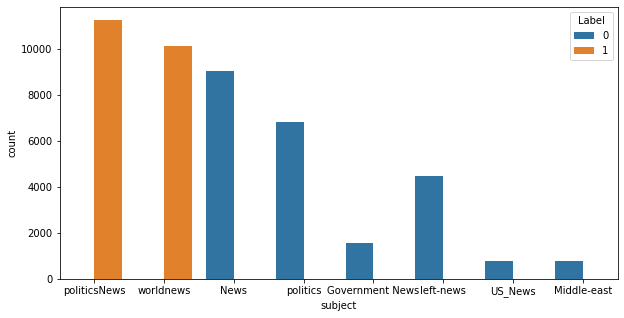

In [389]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "Label", data=dataset)

Label
0    23481
1    21417
Name: text, dtype: int64


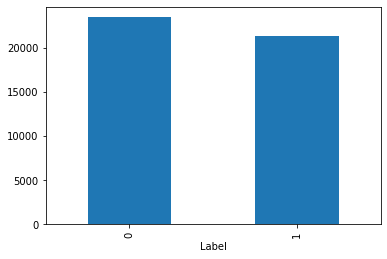

In [390]:
# How many fake and real articles?
print(dataset.groupby(['Label'])['text'].count())
dataset.groupby(['Label'])['text'].count().plot(kind="bar")
plt.show()

In [391]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


## 2.3 Print the shapes of train and test data.

In [392]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset['text'], dataset.Label, test_size=0.2, random_state=42)

In [393]:
X_train.shape

(35918,)

In [394]:
X_test.shape

(8980,)

In [395]:
y_train.shape

(35918,)

In [396]:
y_test.shape

(8980,)

# 3. Data Pre-Processing

In [397]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(X_train[:2])

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.6762637 ,  0.36566633,  0.15799001,  0.7455838 ,  0.10752916,
         0.02726057,  0.19175585, -0.53263694,  0.02645369, -0.34257412,
         0.18990925, -0.5863261 , -0.08813672, -0.05235053,  0.41364285,
        -0.10950428, -0.02759743,  0.23644386,  0.18427625, -0.26734704,
        -0.0806255 , -0.05824664,  0.35589135,  0.1614714 , -0.03937   ,
         0.88691413, -0.8938478 , -0.01000619,  0.38181284, -0.39137727,
        -0.89207304,  0.3863561 ,  0.30663025,  0.14063565, -0.75426054,
         0.5474254 ,  0.5392539 ,  0.3541016 ,  0.36251965, -0.22261517,
        -0.21186964,  0.10848372, -0.3798515 ,  0.50062865, -0.5748089 ,
        -0.21696912, -0.09802147, -0.4701827 , -0.61109304, -0.33805057],
       [ 0.4502573 ,  0.33862573,  0.07409427,  0.17752995, -0.31967235,
         0.19493477, -0.24074934, -0.00411644,  0.42225355, -0.01860114,
        -0.3425406 ,  0.25350344,  0.32082883, -0.4217546 ,  0.36043105,
 

In [398]:
X_train.head()

36335                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# 4. Model Building

## 4.1 Model Architecture

In [399]:
learning_rate = 0.001
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
# model.add(Dropout(0.25))
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(Dropout(0.25)) # to avoid overfitting
# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # since binary classification


## 4.2 Model Summary

In [400]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 408       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 48,191,161
Trainable params: 48,191,161
Non-trainable params: 0
__________________________________________

# 5. Model Compilation

In [401]:
optimizer = keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
# using the default learning rate

# 6. Model Training

## 6.1 Train the model

In [402]:
# history= model.fit(X_train.shuffle(10000).batch(512), epochs=10, validation=validation_data.batch(512), verbose=1)
start = time.time()
history = model.fit(X_train, y_train, batch_size = 512,epochs = 10, validation_data=(X_test, y_test), verbose=1)
end = time.time()

Epoch 1/10
71/71 [==============================] - 6s 66ms/step - loss: 0.6979 - accuracy: 0.5160 - val_loss: 0.6843 - val_accuracy: 0.5341
Epoch 2/10
71/71 [==============================] - 5s 66ms/step - loss: 0.6730 - accuracy: 0.5750 - val_loss: 0.6586 - val_accuracy: 0.6318
Epoch 3/10
71/71 [==============================] - 5s 65ms/step - loss: 0.6361 - accuracy: 0.6590 - val_loss: 0.6109 - val_accuracy: 0.7060
Epoch 4/10
71/71 [==============================] - 5s 65ms/step - loss: 0.5926 - accuracy: 0.7293 - val_loss: 0.5688 - val_accuracy: 0.7981
Epoch 5/10
71/71 [==============================] - 5s 65ms/step - loss: 0.5532 - accuracy: 0.8015 - val_loss: 0.5277 - val_accuracy: 0.8635
Epoch 6/10
71/71 [==============================] - 5s 65ms/step - loss: 0.5161 - accuracy: 0.8448 - val_loss: 0.4878 - val_accuracy: 0.9063
Epoch 7/10
71/71 [==============================] - 4s 63ms/step - loss: 0.4789 - accuracy: 0.8806 - val_loss: 0.4493 - val_accuracy: 0.9300
Epoch 8/10
71

## 6.2 Loss graphs

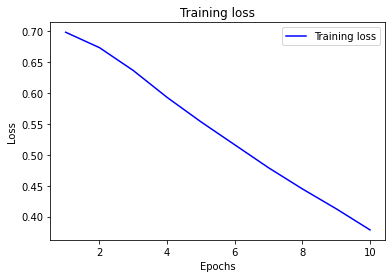

In [403]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

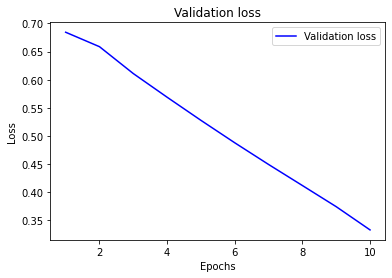

In [404]:

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 6.3 Time taken

In [405]:
print("Total time taken in training the model: ", end - start, "seconds")

Total time taken in training the model:  46.73694157600403 seconds


# 7. Model Evaluation

## 7.1 Final Model Train & Validation loss & accuracy

In [406]:
epochs[-1]

10

In [407]:
n = epochs[-1]-1
print(f'Final Train Accuracy {acc[n]}')
print(f'Final Validation Accuracy {val_acc[n]}')

print(f'\nFinal Train Loss {loss[n]}')
print(f'Final Validation Loss {val_loss[n]}')

Final Train Accuracy 0.9048388004302979
Final Validation Accuracy 0.9670378565788269

Final Train Loss 0.3785427510738373
Final Validation Loss 0.3329906463623047


## 7.2 Model Prediction

In [408]:
pred = model.predict(X_test)
pred = (pred > 0.5).astype(float)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

## 7.3 Confusion Matrix

In [409]:
cm = confusion_matrix(y_test, pred)

cm

array([[4528,  122],
       [ 174, 4156]])

## 7.4 Test Accuracy

In [410]:
acuracy = accuracy_score(y_test, pred)
print(f'Accuracy of the model is: {acuracy}')

Accuracy of the model is: 0.9670378619153674


## 7.5 Classification Report

In [411]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.96299   0.97376   0.96835      4650
           1    0.97148   0.95982   0.96561      4330

    accuracy                        0.96704      8980
   macro avg    0.96724   0.96679   0.96698      8980
weighted avg    0.96709   0.96704   0.96703      8980



## 7.6 Incorrectly classified texts analysis

In [412]:
len(X_test)

8980

In [413]:
X_test = pd.DataFrame(X_test, columns = ['text'])
X_test['label'] = y_test
X_test['pred'] = pred
X_test['pred'] = X_test['pred'].fillna(0)

In [414]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980 entries, 22216 to 15236
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    8980 non-null   object 
 1   label   8980 non-null   int64  
 2   pred    8980 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 280.6+ KB


In [415]:
X_test.head(2)

,text,label,pred
22216,"Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",0,0.0
27917,"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget all the missteps, gaffes, weirdness, and sheer idiocies of such candidates as Jeb Bush, Marco Rubio, John Kasich, Ted Cruz, Ben Carson, and Carly Fiorina?There s a video making the rounds on Twitter that does just that, and eulogizes three of these failed candidates as though they re dead (and the GOP itself might as well be dead at this point anyway). Appropriately titled, A Eulogy for the GOP, people make short speeches about each of these candidates.Once past the man who actually says Jeb Bush was qualified to be president, there are fake tears, with journalist and comedienne Francesca Fiorentini saying: Dearly beloved, we re gathered here today to commemorate the candidates that are no longer with us. One man, speaking to an amusing, circus-y rendition of Chopin s Funeral March, remembers Jeb this way: Jeb, we hardly knew ye. It s too bad that your policies couldn t find their way out of the Republican morass. Indeed, it was like Jeb and his policies were invisible sometimes, although many felt that he would win the nomination early on. His best performances often came during debates, when he d get into out-and-out fights with Donald Trump over virtually everything under the sun. He also had a bad habit of defending his brother s actions in Iraq, memorably saying, As it relates to my brother, there s one thing I know for sure: He kept us safe. Moving on to Marco Rubio, Fiorentini herself says: He was called so many things: Young, charming, Lil Marco.' That last nickname is, of course, a reference to Trump s penchant for name-calling. Then, a man speaking Spanish remembers Rubio this way: Marco, why aren t you a normal boy? Anot

### 7.6.1 Incorrectly classified 'true' class

In [416]:
df = X_test.loc[(X_test['label']==1) & (X_test['pred']!=1)]

In [417]:
len(df)

174

In [418]:
df = df.reset_index(drop=True)
df.loc[:2]

,text,label,pred
0,"LAS VEGAS - As Republican presidential nominee Donald Trump prepared to go head-to-head with Democratic rival Hillary Clinton in their third and final debate in Las Vegas on Wednesday, hundreds of hospitality workers and protesters gathered outside the hotel Trump co-owns near the Las Vegas Strip. Demonstrators waved signs and banners next to what organizers called a “wall” of taco trucks. That was a reference to Trump’s proposal to build a wall on the U.S. border with Mexico, as well as a riff on comments by Trump supporter Marco Gutierrez who said that without action on immigration reform, “You’re going to have taco trucks on every corner.” “We have fought for our rights and we don’t want Donald Trump to take them away from us,” said Las Vegas resident Miguel Faria. “If this man gets the presidency then everything will be ruined.” Several protesters wore sashes printed with the phrases “Miss Piggy” and “Miss Housekeeping,” using the names that Clinton has said Trump called a former beauty queen who had gained weight and who was Latina. The protest was organized by the Culinary Union, which represents about 57,000 workers in Nevada, the majority of whom are Latino. Luis Hernandez, a musician with the norteño band “Los Tigres del Norte,” encouraged Latino voters to head to the polls on Nov. 8. “We can’t just go on hoping someone will vote on our behalf,” he told Reuters. “We need to go out and vote because the Hispanic vote is going to make the difference in these elections.” Among the speakers at the protest was civil rights leader the Rev. Jesse Jackson, who said he hoped the candidates would stick to policies at Wednesday’s debate, instead of attacking each other. “We all as Americans live under one big tent. Hillary represents that higher ground. I hope that tonight they will not wallow in snake politics but will fly like eagles and take us all to higher ground,” Jackson told Reuters. According to Bethany Khan, the Culinary Union’s communications director, workers at the Trump International Hotel voted to unionize in December 2015 but still do not have a contract. Some protesters blamed that on Trump, who owns 50 percent of the property. “He says he’s the greatest negotiator but he’s not coming to the table to support the workers that give him money and make a profit for him,” said Maria Teresa Liedermann.",1,0.0
1,"LOUISVILLE, Ky. (Reuters) - Three people who claim they were assaulted at a Donald Trump rally in Louisville, Kentucky, last month have filed a lawsuit against the Republican presidential candidate, saying he “incited a riot.” Molly Shah, Kashiya Nwanguma and Henry Brousseau filed the lawsuit on Thursday in Jefferson Circuit Court in Louisville, claiming that Trump’s repeated calls of “get them out” at a rally at the Kentucky International Convention Center on March 1 was intended to direct his supporters to “use unwanted, harmful physical force to remove protesters, including the plaintiffs.” The lawsuit also names as defendants the Trump campaign and three individuals who the plaintiffs claim assaulted them at the rally. The three plaintiffs, all Louisville residents, claim they suffered physical injuries, emotional distress and humiliation, and are seeking unspecified damages, according to the lawsuit. “Peaceful protest is an American tradition, especially in the context of presidential politics,” Dan Canon, the attorney for the plaintiffs, told Reuters in a Twitter message. “But what you see all over the country, time and time again, is violence employed against protesters at Trump campaign events. These plaintiffs are saying ‘enough is enough,’” The lawsuit said Trump stopped his 30-minute speech five times to point out protesters and, in most cases, told supporters to “get ‘em out of here,” according to the lawsuit. A spokeswoman for Trump’s campaign could not be reached for comment. The lawsuit claims that Trump “incited a riot as defined under the Kentucky penal code.” The individual

### 7.6.2 Incorreclty classified 'fake' class

In [419]:
df = X_test.loc[(X_test['label']==0) & (X_test['pred']!=0)]

In [420]:
len(df)

122

In [421]:
df = df.reset_index(drop=True)
df.loc[:2]

,text,label,pred
0,"A federal judge has ordered Michigan election officials to begin a massive hand recount of 4.8 million ballots cast in the presidential election at noon Monday.U.S. District Judge Mark Goldsmith issued a ruling just after midnight Monday in favor of Green Party presidential candidate Jill Stein, who sought to let election officials bypass a two-business-day waiting period that would have delayed start of the recount until Wednesday morning.The manual recount process was scheduled to begin Wednesday as specified by state law, and in a rare Sunday hearing in federal court, Goldsmith questioned the harm posed by waiting.Stein s lawyer Mark Brewer argued the case was aimed at ensuring the integrity of Michigan s voting system and that the required waiting period violated Stein s rights to due process and equal protection. He pushed for the recount of 4.8 million ballots to start immediately, which he said would be Monday morning. There are questions raised throughout the country about the integrity of the election system, Brewer told the judge in front of a courtroom filled with about two dozen people, including state Republican Party Chair Ronna Romney McDaniel. It s not just rhetoric. The hearing ended Sunday afternoon, with a staffer for the judge saying Goldsmith would issue a written opinion but he did not give a timeline.The deadline to finalize the vote total for the Electoral College is Dec. 13. Chris Thomas, the state elections director, testified Sunday that he could not guarantee that the recount could be finished by that deadline, calling the task doable but difficult. Brewer called it highly doubtful that the state could finish by the deadline, and asserted the recount needed to start immediately.Read more: Detroit News",0,1.0
1,"President Donald Trump said his administration would be announcing a big league tax cut that would lower the burden on businesses within the next two or three weeks.The revelation saw the Dow Jones industrial average rise around 115 points to a record, with Goldman Sachs contributing the most gains. Lowering the overall tax burden on American business is big league, that s coming along very well, Trump said at the top of a White House meeting with airline industry executives Thursday. We re way ahead of schedule, I believe. And we re going to be announcing something I would say over the next two or three weeks that will be phenomenal. The president s comment had an immediate effect on the value of the U.S. dollar against other currencies.The administration had gotten pushback a day earlier from conservative web site proprietor Matt Drudge, an influential media figure who Trump regularly lauded during the campaign. Republican party should be sued for fraud. NO discussion of tax cuts now. Just lots of crazy. Back to basics, guys! Drudge tweeted, on a day filled with fallout from the Senate effort to silence liberal Massachusetts Senator Elizabeth Warren.Tax reform has also been a top priority for House Speaker Paul Ryan and others in the GOP congressional majority, which has been anxious to slash taxes and regulations now that it finally has an ally in the White House.Trump has pledged to cut the top corporate tax rate from 35 per cent to 15 per cent, but he offered no details on what his proposal might be. The value of the dollar against the Japanese yen jumped by 1 percentage point after the president s comments, Reuters reported. Airline stocks also spiked after the meeting. All three major market indexes jumped on news of the tax cut timetable. Daily Mail",0,1.0
2,"One short trip on a boat and this could be all yours! No papers required A group of local citizens from the Italian Island of Sicily have denounced a recent political decision to turn a 4-star seaside resort into the latest migrant welcome center, near the historic city of Agrigento. The hotel Capo Rossello Realmonte is located just a short distance from the Scala dei Turchi, or Turkish Steps, an unusual white